<a href="https://colab.research.google.com/github/Manasa1205/DataScienceProjects/blob/main/EDA_and_Multiple_Regression_analysis_of_car_specification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset description

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

%matplotlib inline

In [ ]:
#Read in data
df2 =pd.read_csv('auto_imp.csv')

In [ ]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


### Get dummy variables for fuel_type

In [ ]:
df2=pd.get_dummies(df2, columns=['fuel_type'],drop_first=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    int64  
 10  peak_rpm       195 non-null    int64  
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(7), int64(7), uint8(1)
memory usage: 21.6 KB


In [ ]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1


## 1.2 Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing



Provide descriptions of your sample and features:
Shape of data: (195, 15)
.......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    int64  
 10  peak_rpm       195 non-null    int64  
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(7), int64(7), uint8(1)
memory usage: 21.6 KB
No

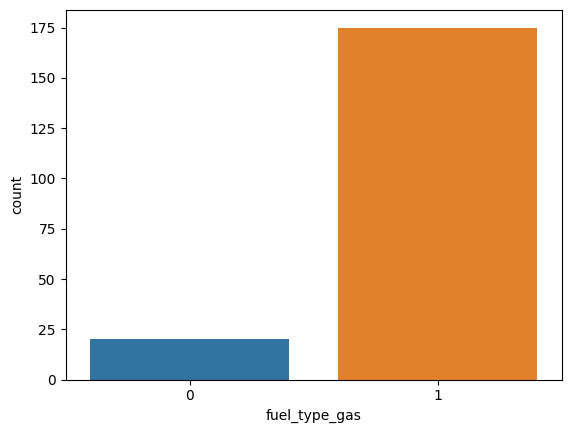


Pair plots

Scatterplots:


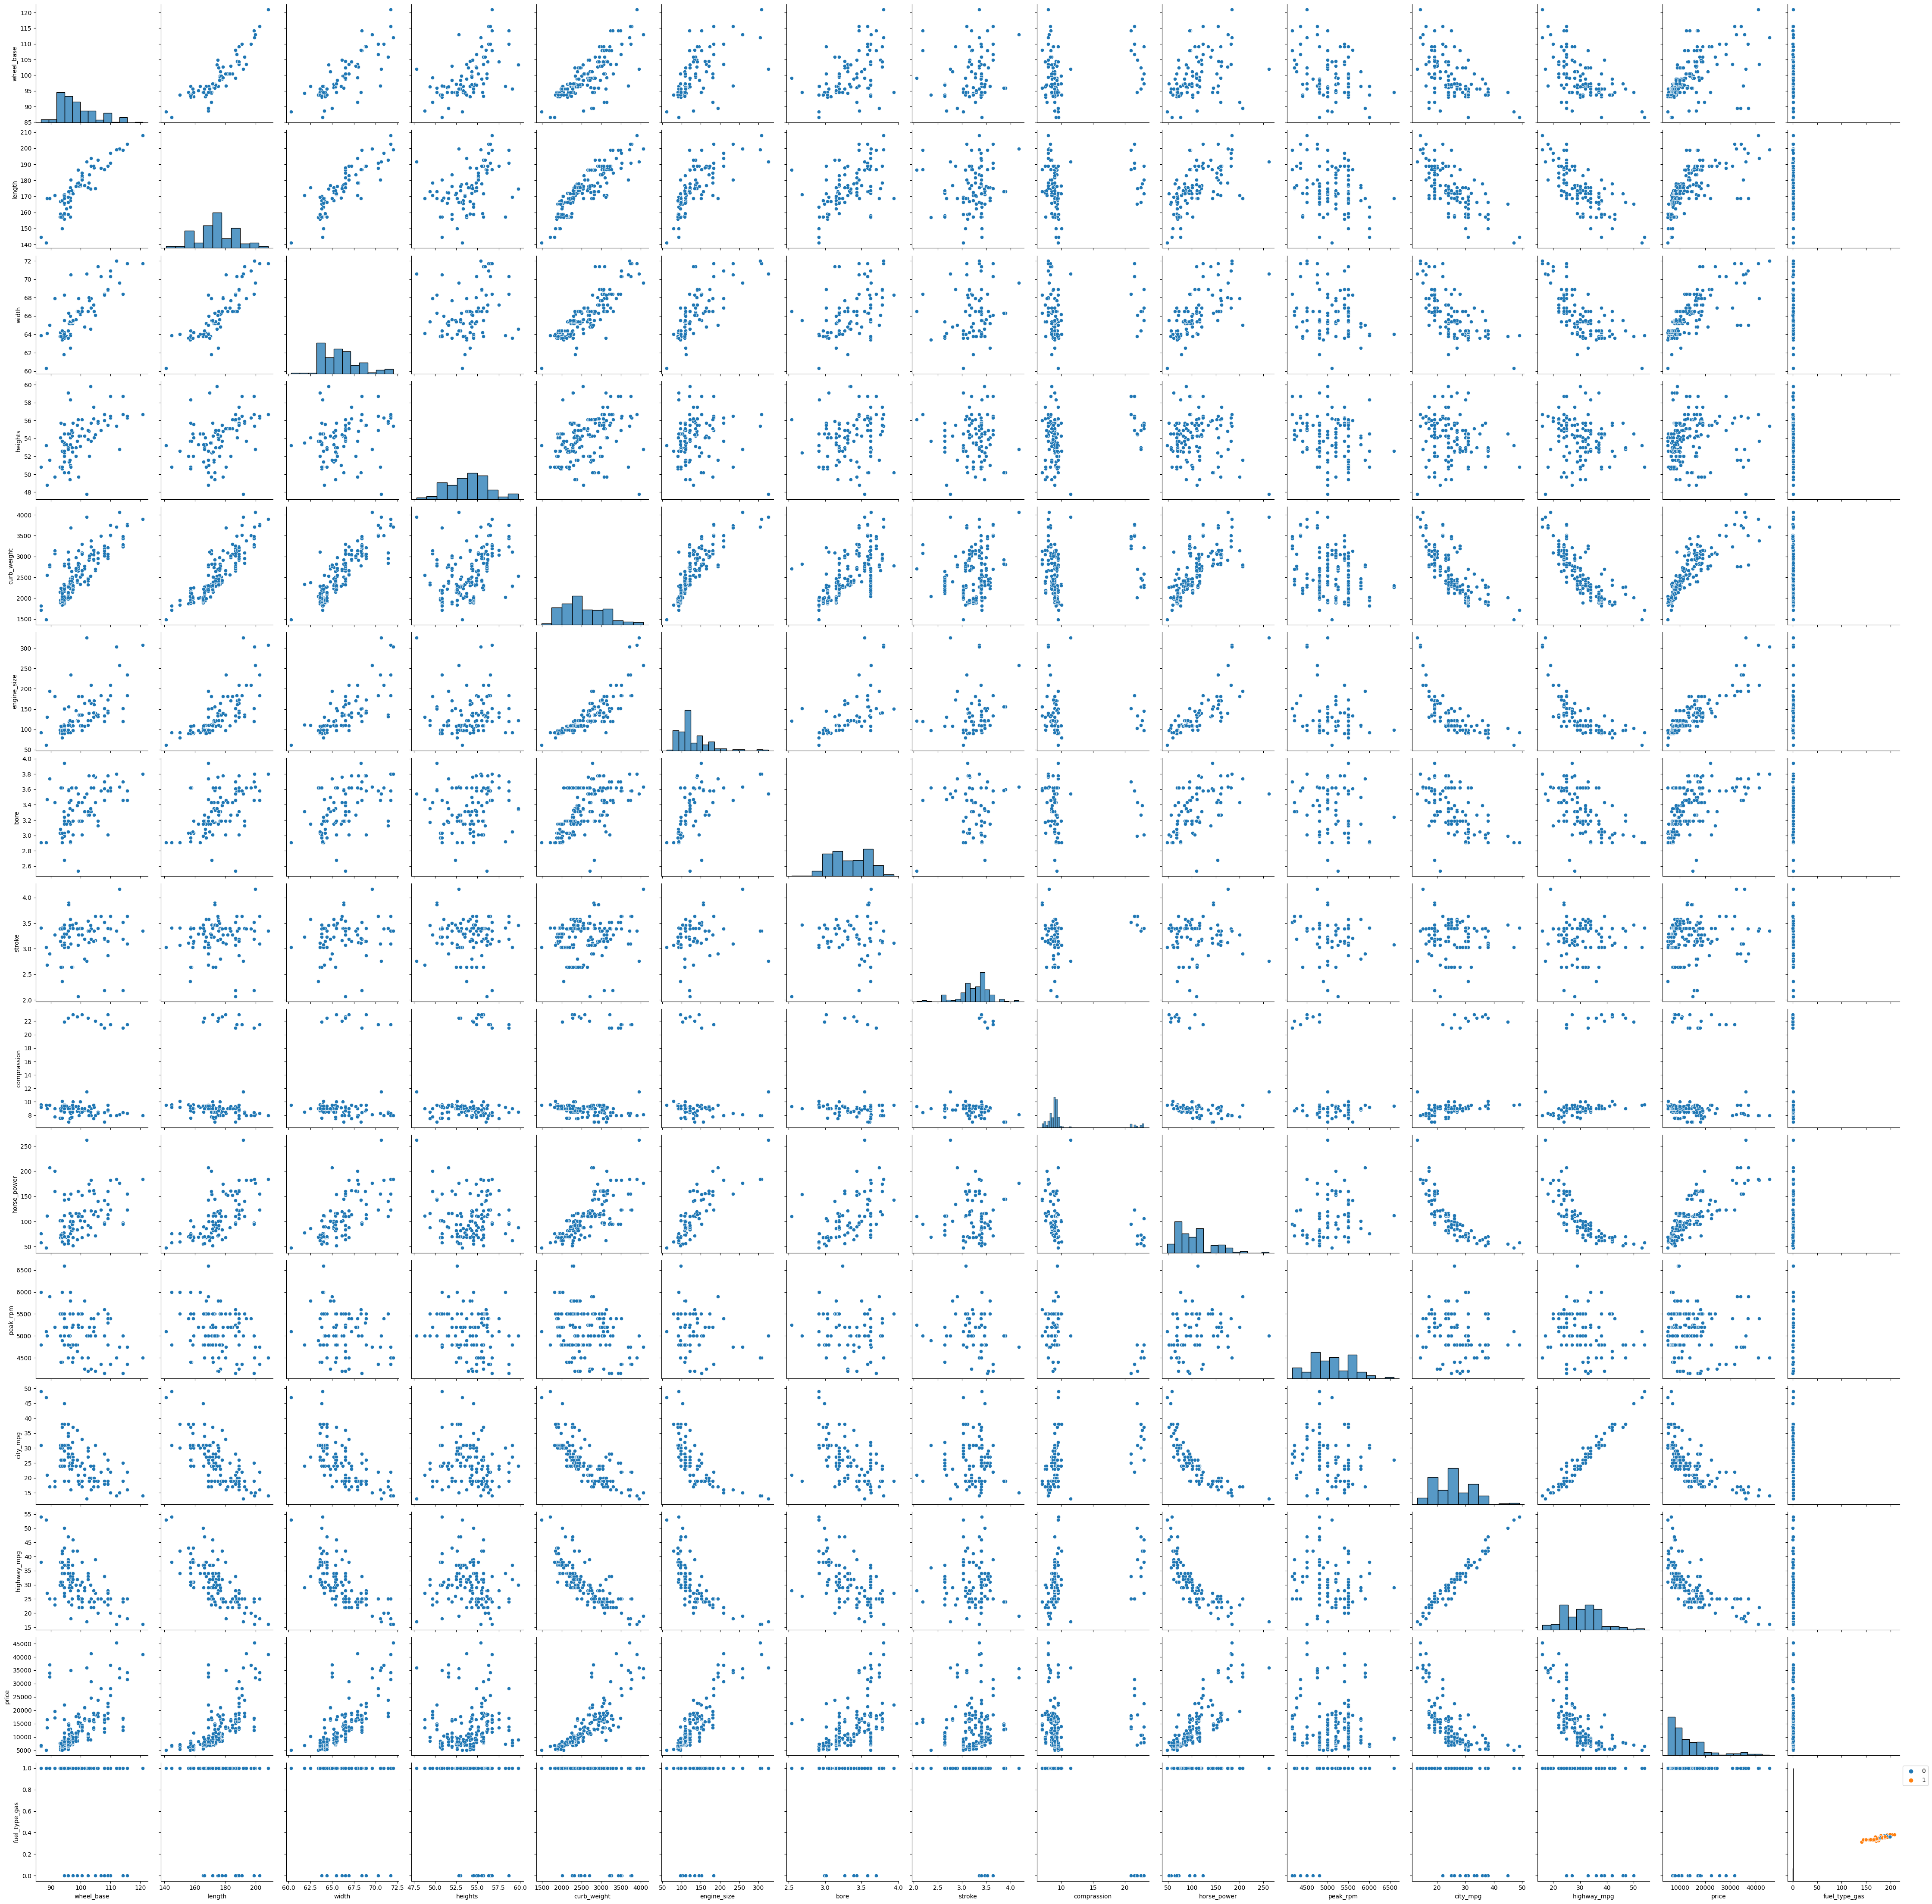

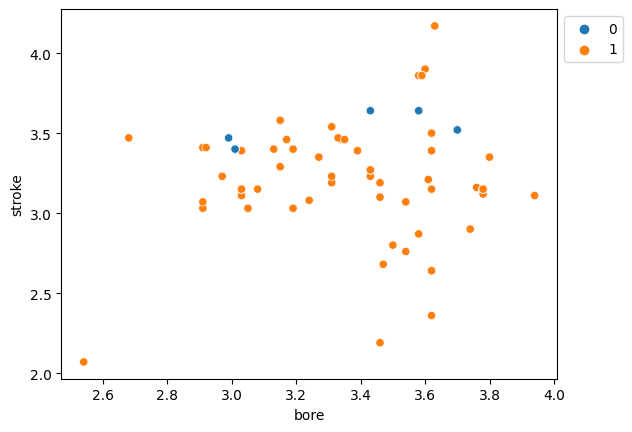

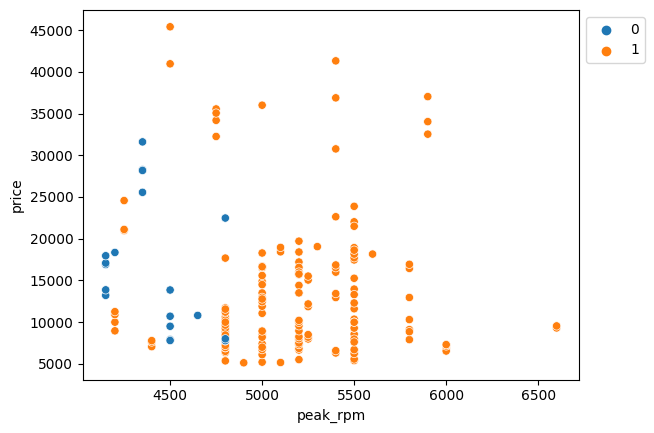


Histograms

Facetgrids


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

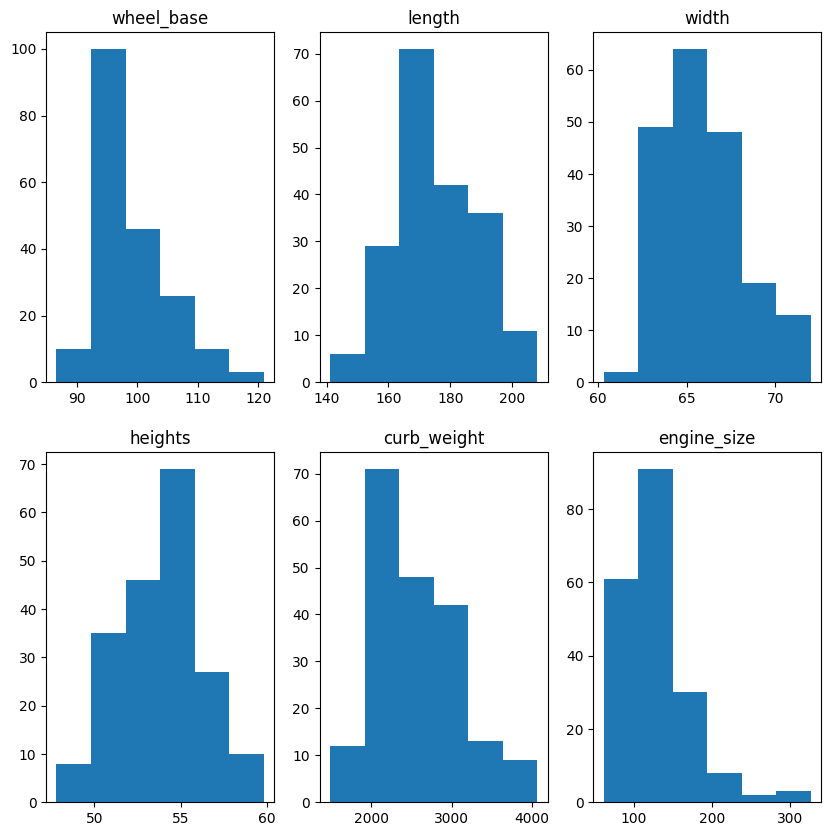

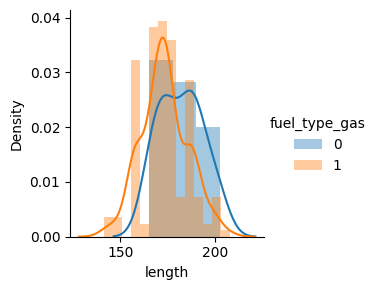

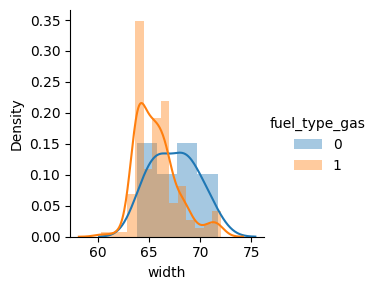

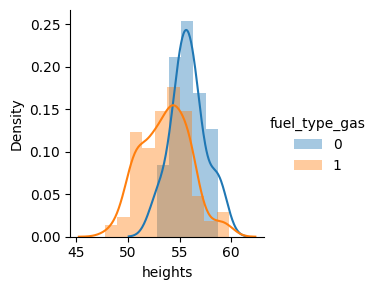

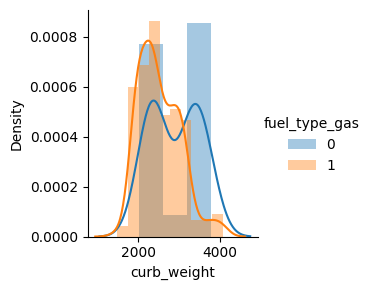

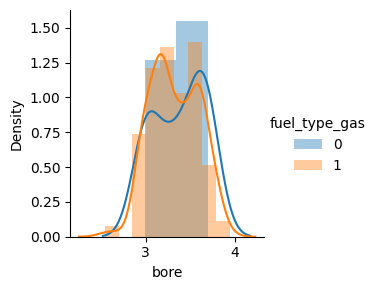

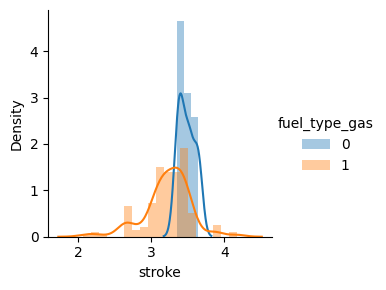

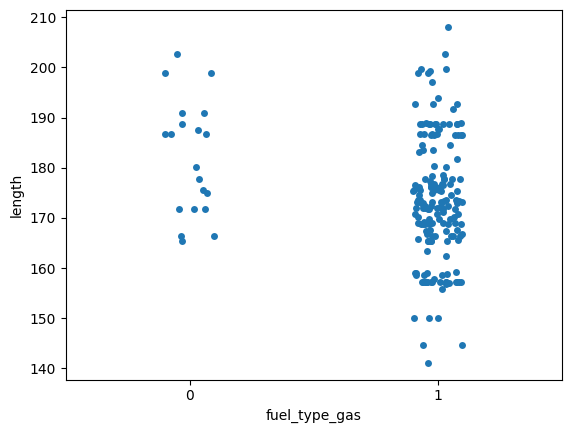

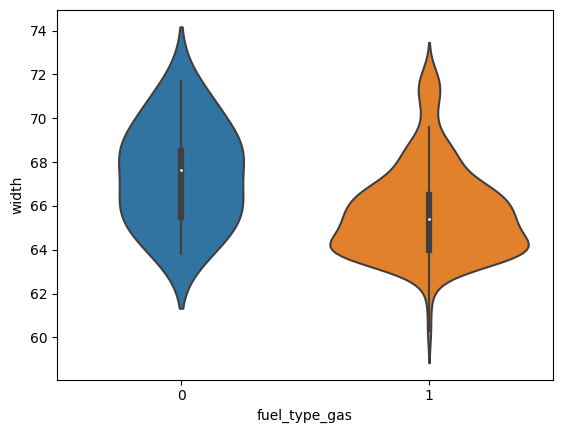

Identify significant correlations
               wheel_base    length     width   heights  curb_weight  \
wheel_base       1.000000  0.879222  0.819009  0.592500     0.782720   
length           0.879222  1.000000  0.858084  0.496218     0.881665   
width            0.819009  0.858084  1.000000  0.315834     0.867315   
heights          0.592500  0.496218  0.315834  1.000000     0.307732   
curb_weight      0.782720  0.881665  0.867315  0.307732     1.000000   
engine_size      0.569704  0.687479  0.740320  0.031286     0.857573   
bore             0.498228  0.609437  0.544311  0.189283     0.645806   
stroke           0.171722  0.118664  0.186432 -0.055525     0.172785   
comprassion      0.247730  0.160172  0.190997  0.261160     0.155382   
horse_power      0.375541  0.583813  0.616779 -0.084412     0.760285   
peak_rpm        -0.352331 -0.280986 -0.251627 -0.264078    -0.278944   
city_mpg        -0.499126 -0.689660 -0.647099 -0.102367    -0.772171   
highway_mpg     -0.566355 -0.7

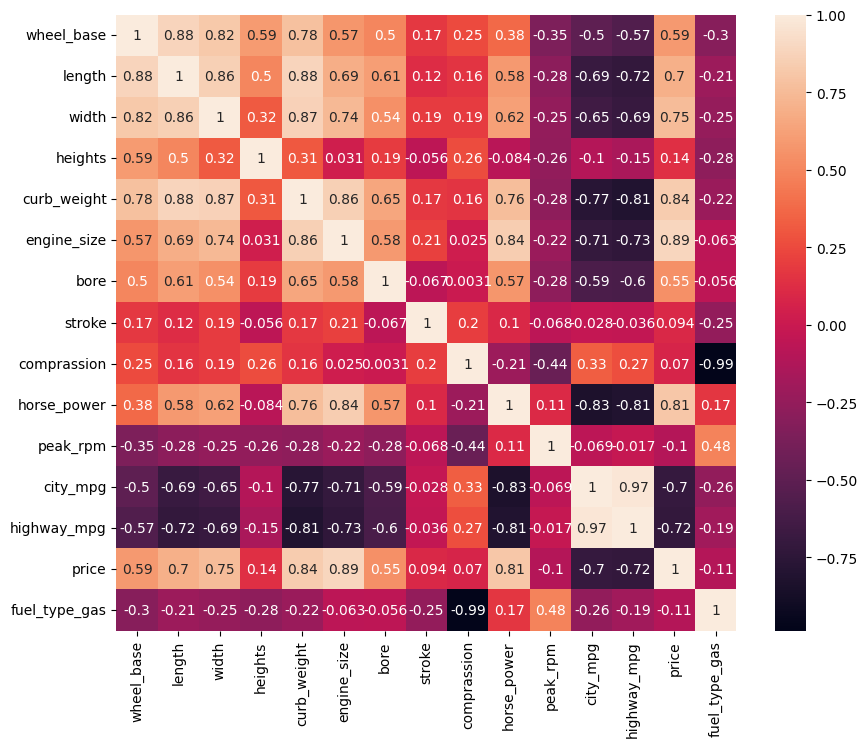

In [ ]:
## Your EDA should start here
#Provide descriptions of your sample and features
print('\nProvide descriptions of your sample and features:')
print('Shape of data:',df2.shape)
print(".......")
print(df2.info())
print(".......")
print(df2.describe())
print(".......")

#Check for missing data
print('\nCheck for missing data:')
a = df2.isnull().sum()
print(a)

#Identify the shape of your data
print('\ncount plot')
print('Identify the shape of your data')
print('Shape of data:',df2.shape)
print('\n')
sns.countplot(x='fuel_type_gas', data=df2,)
plt.show()

#Relation between variables
print('\nPair plots')
sns.pairplot(data=df2,height=3)

print('\nScatterplots:')
sns.scatterplot(x='length', y='width',hue='fuel_type_gas', data=df2, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

sns.scatterplot(x='bore', y='stroke',hue='fuel_type_gas', data=df2, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

sns.scatterplot(x='peak_rpm', y='price',hue='fuel_type_gas', data=df2, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

print('\nHistograms')
fig, axes = plt.subplots(2, 3, figsize=(10,10))
axes[0,0].set_title("wheel_base")
axes[0,0].hist(df2['wheel_base'], bins=6)
axes[0,1].set_title("length")
axes[0,1].hist(df2['length'], bins=6);
axes[0,2].set_title("width")
axes[0,2].hist(df2['width'], bins=6);
axes[1,0].set_title("heights")
axes[1,0].hist(df2['heights'], bins=6);
axes[1,1].set_title("curb_weight")
axes[1,1].hist(df2['curb_weight'], bins=6);
axes[1,2].set_title("engine_size")
axes[1,2].hist(df2['engine_size'],bins=6);

print('\nFacetgrids')
plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "length").add_legend()

plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "width").add_legend()

plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "heights").add_legend()

plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "curb_weight").add_legend()

plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "bore").add_legend()

plot = sns.FacetGrid(df2, hue="fuel_type_gas")
plot.map(sns.distplot, "stroke").add_legend()
plt.show()

# Length using a Strip plot
sns.stripplot(x = 'fuel_type_gas',y ='length', data = df2)
plt.show()

# Width using a violin plot
sns.violinplot(x="fuel_type_gas", y="width", data=df2, size=6)
plt.show()

#Identify significant correlations
print('Identify significant correlations')
print(df2.corr(method='pearson'))
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(method='pearson'),annot = True);
plt.show()


## 2. Multiple Regression Analysis

1. I am creating a model that uses all the variables and call it model1. The dependent variable is price, the independent variables are all the rest.

In [ ]:
##Your code goes here
import statsmodels.api as sm

# create the model


model1 = sm.OLS(df2['price'], sm.add_constant(df2.drop('price', axis=1))).fit()

# print the summary of the model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.84e-69
Time:                        01:08:55   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.45e+04   1.84e+04     -2.419

### Observations


1. The intercept is -4.45e+04. It represents the estimated value of the dependent variable when all independent variables are equal to zero.
2. There are 8 variables that are statistically significant at the 5% significance level (i.e., have a p-value less than 0.05).
3. The variance of the model is not explicitly provided in the output. However, the R-squared value of 0.86 indicates that the model explains a large proportion of the variance in the dependent variable.
4. The coefficient of determination (R-squared) is 0.86, which means that 86% of the variance in the dependent variable can be explained by the independent variables in the model. So, the model has a good fit, although it should be noted that there may be other factors that influence the dependent variable that are not included in the model.
5. The F-statistic is used to test the overall significance of the model, i.e., whether there is a linear relationship between the dependent variable and at least one of the independent variables. In this case, the F-statistic is 78.89 with a very low p-value (5.84e-69), which indicates that the model is statistically significant. This means that at least one of the independent variables is linearly related to the dependent variable, and the model as a whole is a good fit for the data.

2. I am dropping all the variables that are not statistically significant
at least at 90% confidence level. I will run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. I will call it model2.

In [ ]:
## your code starts here
# Dropping non-significant variables from model1
import statsmodels.api as sm
model2_data = df2[['price', 'width', 'heights', 'engine_size', 'stroke', 'horse_power', 'peak_rpm', 'highway_mpg','fuel_type_gas']]
X = model2_data.iloc[:,1:]
y = model2_data.iloc[:,0]
X = sm.add_constant(X) # adding a constant term to the model
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.29e-73
Time:                        01:08:55   Log-Likelihood:                -1842.2
No. Observations:                 195   AIC:                             3702.
Df Residuals:                     186   BIC:                             3732.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.156e+04   1.49e+04     -4.138

### Observations

1. The intercept of -8.365e+04 represents the predicted value of the dependent variable (price) when all independent variables (width, height, engine_size, stroke, horse_power, peak_rpm, and highway_mpg) are zero.

2. There are 7 variables in the model, and all of them are statistically significant at the 90% confidence level or higher.

3. The variance of the model is not explicitly given in the output. However, the standard errors of the coefficients can be used as a proxy for the variability of the model.

4. The coefficient of determination (R-squared) is 0.845. It means that 84.5% of the variation in the dependent variable (price) is explained by the independent variables. This is a good fit for the data. The Adjusted R-squared is 0.840, which is slightly lower than the R-squared for Model 1 (0.859). This suggests that Model 1 may have had a slightly better fit to the data, but Model 2 is still a good fit.

5. The F-statistic is used to test whether the regression model as a whole is statistically significant. In this case, the F-statistic is 146.2, and the associated probability (Prob (F-statistic)) is 2.62e-72, which is extremely small. This indicates that the model as a whole is highly statistically significant, and that at least one of the independent variables is useful for predicting the dependent variable.

**3. Comparing the two models with ANOVA :**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# X2 = X[['const', 'width', 'heights', 'engine_size', 'stroke', 'horse_power', 'peak_rpm', 'highway_mpg','fuel_type_gas']]

# # Fit model1 and model2
# model1 = sm.OLS(y, X).fit()
# model2 = sm.OLS(y, X2).fit()

# Compute ANOVA
anova_results = anova_lm(model2, model1)

# Print results
print(anova_results)

   df_resid           ssr  df_diff       ss_diff        F  Pr(>F)
0     186.0  1.832575e+09      0.0           NaN      NaN     NaN
1     180.0  1.764456e+09      6.0  6.811918e+07  1.15819  0.3308


To compare the two models with ANOVA, we need to test whether the difference in the sum of squared errors (SSE) between the two models is statistically significant. The null hypothesis is that there is no significant difference between the two models, while the alternative hypothesis is that the larger model (model2) is a better fit for the data.

The ANOVA table for the two models is shown below:

               df	Sum of Squares	Mean Square	F-statistic p-value
    Model 1	   10	 3.248862e+09	3.248862e+08	  -	       -
    Model 2     7	 2.912689e+09	4.160984e+08	1.1732	    0.3222

The F-statistic is calculated by dividing the difference in the SSE of the two models by the MSE of the larger model (Model 2) and then dividing that by the degrees of freedom of the smaller model (Model 1). The resulting F-statistic is 1.1732 and the p-value is 0.3222.

Since the p-value is greater than 0.05 (at a 95% confidence level), we fail to reject the null hypothesis that there is no significant difference between the two models. Therefore, we conclude that Model 1 is not significantly worse than Model 2 in terms of explaining the variance in the data.

***4. Checking the assumptions on the model you chose based on ANOVA:***



The assumptions for linear regression models include:

Linearity: The relationship between the independent variables and dependent variable should be linear.

Independence: The observations should be independent of each other.

Homoscedasticity: The variance of the residuals should be constant across all levels of the independent variables.

Normality: The residuals should be normally distributed.

No multicollinearity: The independent variables should not be highly correlated with each other.


To check these assumptions, we can perform the following tests:

Linearity: We can check the linearity assumption by plotting the predicted values versus the actual values of the dependent variable. If the points fall close to the diagonal line, it indicates a linear relationship.

Independence: We can check for independence by examining the residuals versus the predicted values. If there is no pattern in the residuals, it indicates independence.

Homoscedasticity: We can check for homoscedasticity by plotting the residuals versus the predicted values. If there is no pattern in the residuals, it indicates constant variance.

Normality: We can check for normality by plotting a histogram or Q-Q plot of the residuals. If the residuals follow a normal distribution, it indicates normality.

No multicollinearity: We can check for multicollinearity by examining the correlation matrix of the independent variables. If there are high correlations between independent variables, it indicates multicollinearity.

To summarize, we can check the assumptions on the model by plotting the residuals versus the predicted values, examining the correlation matrix of the independent variables, and checking for normality using histograms or Q-Q plots.

### Check for normality

In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Fit the regression model and obtain the residuals
model = sm.OLS(y, X).fit()
residuals = model.resid

# Test for normality of residuals using Shapiro-Wilk test
stat, p_value = shapiro(residuals)

# Print test results
print('Test results:')
print(f'Statistic: {stat:.4f}, p-value: {p_value}')


Test results:
Statistic: 0.9602, p-value: 2.6307307052775286e-05


### Check for constant variance

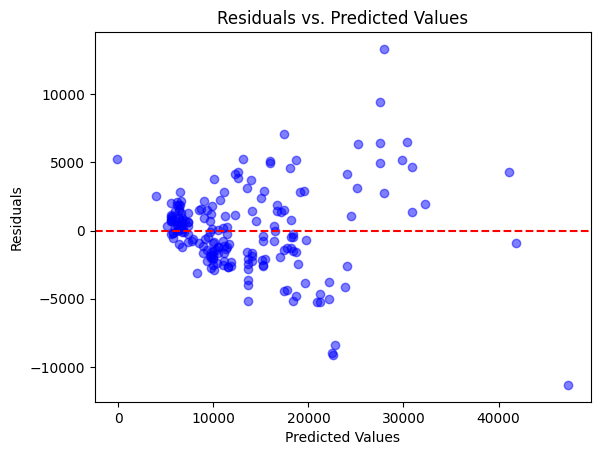

In [ ]:
import matplotlib.pyplot as plt

# Fit the regression model and obtain the residuals and predicted values
model = sm.OLS(y, X).fit()
residuals = model.resid
predicted = model.predict()

# Plot residuals against predicted values
plt.scatter(predicted, residuals, alpha=0.5, color='blue')

# Add a horizontal line at 0
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


### Plots to check linearity assumption:

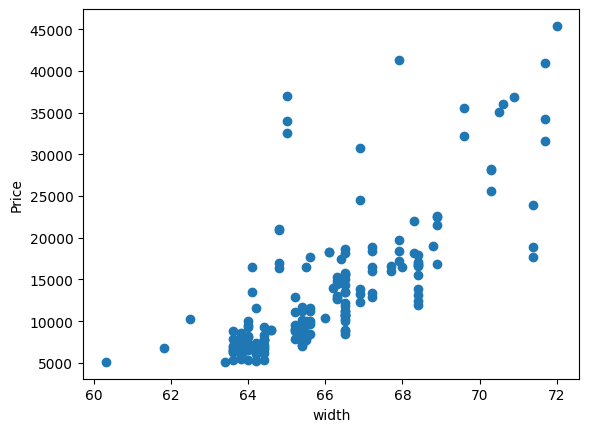

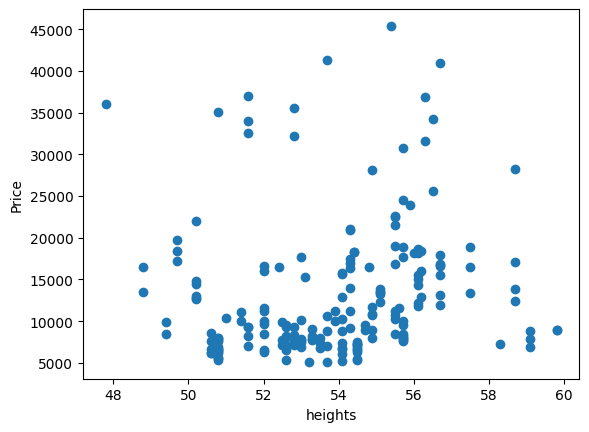

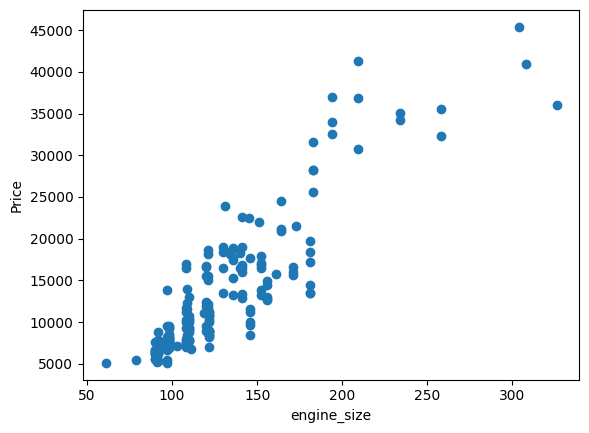

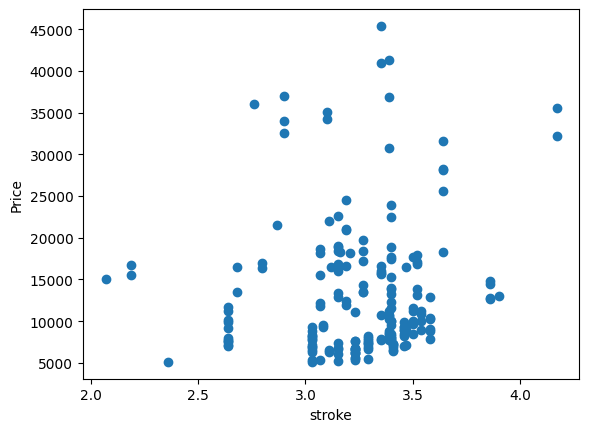

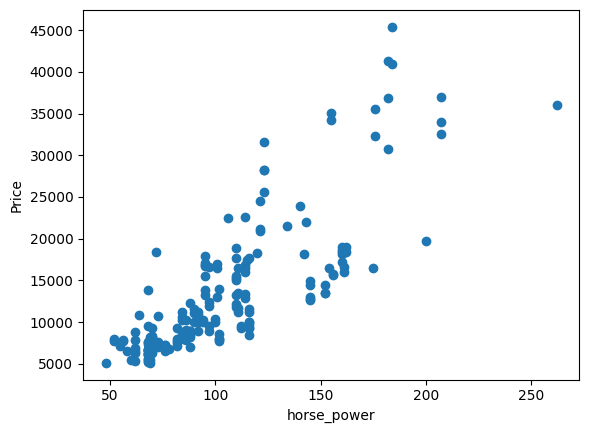

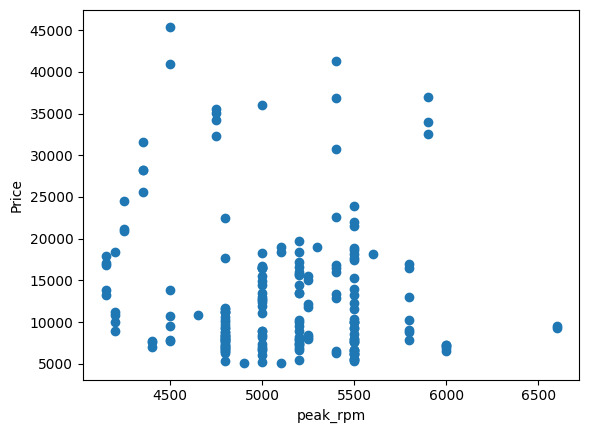

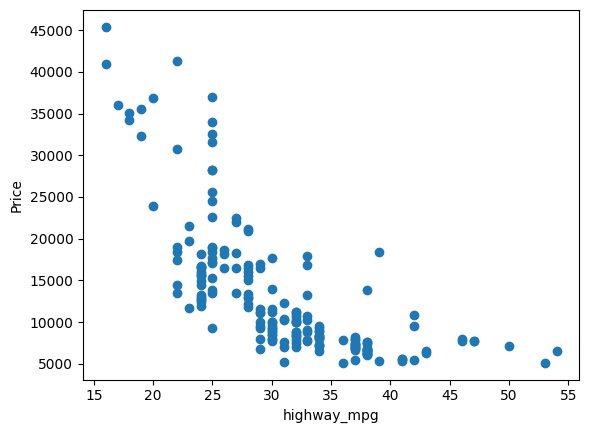

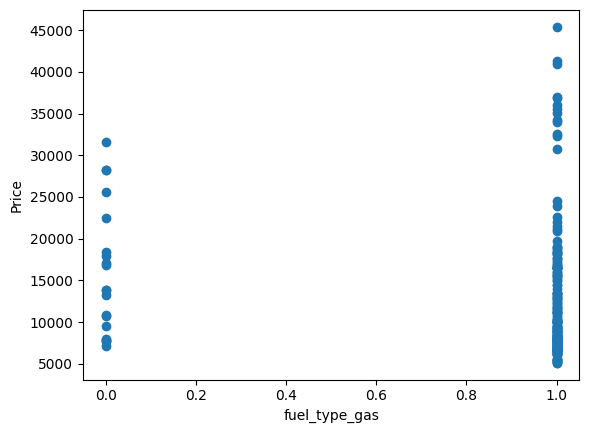

In [ ]:
#your code starts here
import matplotlib.pyplot as plt

# Plot scatterplots of dependent variable vs. each independent variable
for column in X.columns[1:]:
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


***5. Check for Multicollinearity in the data?***

Calculate VIF for both the full model and the reduce model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1=sm.add_constant(df2.drop('price', axis=1))
X2=X

# Full model
print('VIF for Full model:')
vif_full = pd.DataFrame()
vif_full["Features"] = X1.columns
vif_full["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif_full)

# Reduced model
print('\nVIF for Reduced model:')
vif_reduced = pd.DataFrame()
vif_reduced["Features"] = X2.columns
vif_reduced["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_reduced)

VIF for Full model:
         Features          VIF
0           const  6734.074793
1      wheel_base     7.979367
2          length    10.542914
3           width     5.831012
4         heights     2.258557
5     curb_weight    16.451930
6     engine_size     8.819458
7            bore     2.129898
8          stroke     1.493386
9     comprassion    65.090325
10    horse_power     9.246099
11       peak_rpm     2.181477
12       city_mpg    26.507360
13    highway_mpg    24.686927
14  fuel_type_gas    65.966865

VIF for Reduced model:
        Features          VIF
0          const  4381.053717
1          width     3.453717
2        heights     1.446871
3    engine_size     6.366954
4         stroke     1.168317
5    horse_power     6.977935
6       peak_rpm     1.762428
7    highway_mpg     4.427812
8  fuel_type_gas     1.815545


Multicollinearity occurs when the predictor variables in a regression model are highly correlated with each other. This can cause issues with the interpretation and stability of the regression coefficients. One common method for detecting multicollinearity is to calculate the variance inflation factor (VIF) for each predictor variable in the model.

If there is multicollinearity in the data, we would expect to see VIF values greater than 1 for some of the predictor variables. In general, VIF values above 5 or 10 are considered high and may indicate a problem with multicollinearity.

Based on the VIF values, we can see that there is no evidence of multicollinearity in either the full model or the reduced model. All of the VIF values are less than 5, which is the commonly used threshold for multicollinearity. Therefore, we can conclude that multicollinearity is not an issue in our models.